In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

Применим метод градиентного спуска для находения минимума функции $Q$.

Для выбора размера шага будем использовать метод Армихо.

Найдем градиент оптимизируемой функции:
\begin{equation}
\nabla Q = \sum^m_{i=1} \frac{ -y_i \cdot \exp(−y_i \cdot < x_i , \omega >)}{1 + \exp(−y_i \cdot <x_i , \omega >)}
\vec{x_{i}}
\end{equation}

Для потсчета будем избегать прямого вычисления экспоненты, чтобы не получить переполнение.

## Описание алгоритма:
Выберем начальное приближение решения $x_0$ 

Построим последовательость $\{x_n\}$ : $x_{n+1} = x_n - s \cdot \nabla Q$, где $s$ - размер шага, который определит алгоритм Армихо. Каждый следующий член последовательности и будет приближением решения. Остановимся на шаге, который даст необходимую точность, т.е. при выполнении $|Q(x_n) - Q(x_{n-1})| < \varepsilon$.

### Алгоритм Армихо:
$\alpha \in (0,0.5)$ 

$\beta \in (0,1)$ 

$s_0 = 1$

найдем такое $k$, что $s = s_0 \cdot \beta ^ k $ и $Q(x - s\nabla Q) \leq Q(x) -  \alpha s \cdot |\nabla Q|^2 $
    
Полученное $s$ - искомый размер шага.

In [690]:
def risk_function(w,X,Y):
    exp_arg = [-Y[i] * np.sum(X[i]*w) for i in range(len(Y))]
    return np.sum(np.logaddexp(0,exp_arg[i]) for i in range(len(Y)))

def grad_risk_function(w,X,Y):
    S = []
    
    exp_arg1 = [-Y[i] * np.sum(X[i]*w) for i in range(len(Y))]
    exp_arg2 = np.array([np.logaddexp(0,exp_arg1[i]) for i in range(len(Y))]) 
    prep = np.array([np.exp(exp_arg1[i] - exp_arg2[i]) for i in range(len(Y))])
    
    for j in range(len(w)):
        S.append(np.sum(-Y[i] * prep[i] * X[i][j] for i in range(len(Y))))
    return np.array(S)

#Use armijo method to find size of the next displacement 
def armijo_step_size(w, X, Y,k):
    grad = grad_risk_function(w,X,Y)
    a = 0.4
    b = 0.5
    s = 1
    dw = np.ones_like(w)
    while (risk_function(w - s*grad,X,Y) > 
           risk_function(w,X,Y) + a * s * np.sum(grad*(-1)*grad)):
        s = b*s
#     print(s)
    return s

# points, classes, number of iterations
def gradient_descent(X,Y,eps=1e-6,init=[0,1,-1],abort=int(1e7),step_size=armijo_step_size):
    dim = len(X[0])
    X = np.array([np.concatenate([[-1.0],x]) for x in X])
    w_old = np.zeros(dim+1)
    w_new = np.array(init)
    k = 0
    w_all = []
    w_all.append(w_new)
    while(np.abs(risk_function(X,Y,w_old) - risk_function(X,Y,w_new)) > eps) :
        w_old = w_new
        w_new = w_new - grad_risk_function(w_new,X,Y)*step_size(w_new,X,Y,k)
        w_all.append(w_new)
        k += 1
        if k >= abort:
            break
    return w_all, k

In [672]:
def build_2D_line(w,color='green',alpha=0.2,label=''):
    if w[1] == 0:
        1/0
    else :
        plt.plot([-20,20],[-w[0]/w[1] - w[2]/w[1]*(-20),-w[0]/w[1] - w[2]/w[1]*(20)],
                 color=color,alpha=alpha,label=label)
col = ['red','blue']
def build_2D_plot(X,Y,alpha=0.5,w=[],color='green'):
    n = len(X)
    plt.figure(figsize=(10,10))
    plt.scatter(X[:n//2, 0], X[:n//2, 1],marker="o", c=col[(Y[0]+1)//2], alpha=alpha)
    plt.scatter(X[n//2:, 0], X[n//2:, 1],marker="o", c=col[(Y[-1]+1)//2], alpha=alpha)
    if len(w) !=0 :
        build_2D_line(w,color)

Сгенерируем два разделимых прямой множества точек на плоскости.

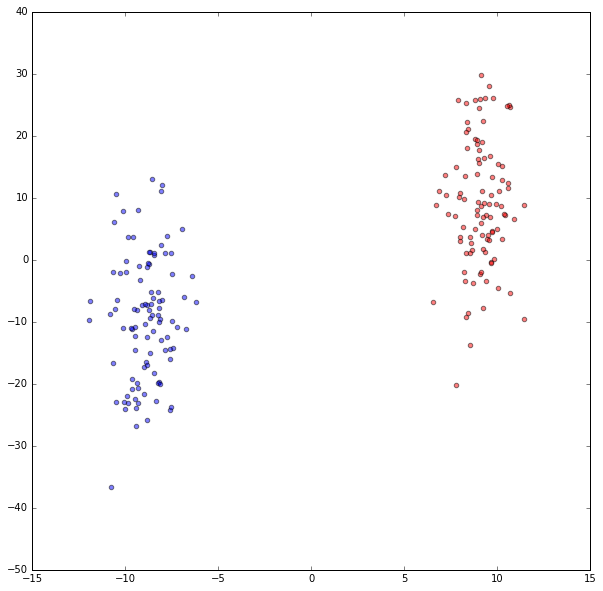

In [673]:
a,d=9,10
mean = [[a,a], [-a,-a]]
cov = [[[d/10,0],[0,10*d]],[[d/10,0],[0,10*d]]]
col = ['red','blue']
size = 100
X = [0,0]
X[0]=(sps.multivariate_normal.rvs(size=size,mean=mean[0],cov=cov[0])) #set 1
X[1]=(sps.multivariate_normal.rvs(size=size,mean=mean[1],cov=cov[1])) #set 2
X = np.concatenate([X[0],X[1]])
Y = np.concatenate([-1 * np.ones(size,dtype=int), np.ones(size,dtype=int)])
build_2D_plot(X,Y)
plt.show()

[ 11.56303223  -3.57536026  -0.27729847]
1000


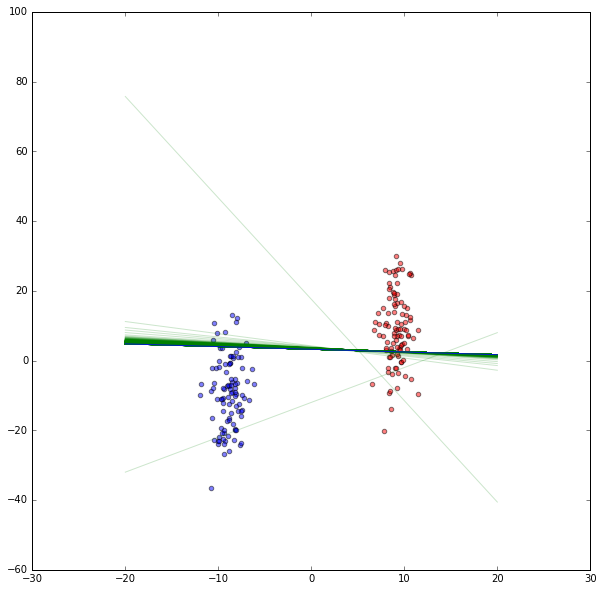

In [674]:
w_all, n = gradient_descent(X,Y,eps=1e-5,init=[12,1,-1],abort=1e3)
print(w_all[-1])
print(n)
build_2D_plot(X,Y)
for w in w_all:
    build_2D_line(w,alpha=0.2)
build_2D_line(w_all[-1],alpha=0.8,color='blue')

[ 11.50294901  -4.84007734  -0.8661691 ]
1000


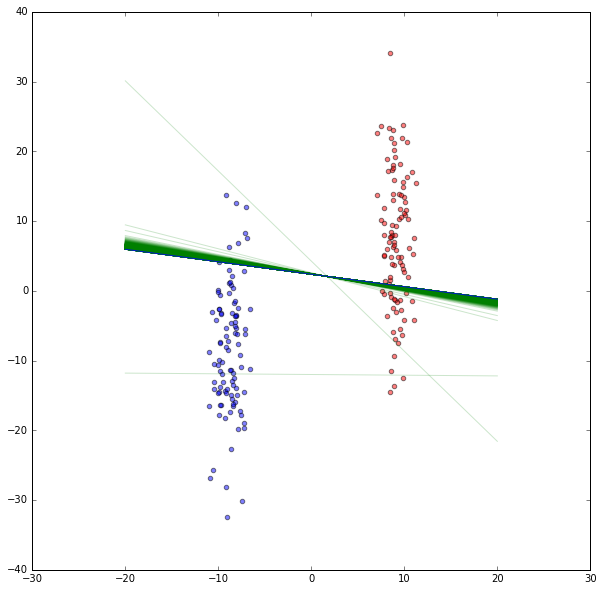

In [643]:
w_all, n = gradient_descent(X,Y,eps=1e-5,init=[12,1,1e-2],abort=1e3)
print(w_all[-1])
print(n)
build_2D_plot(X,Y)
for w in w_all:
    build_2D_line(w,alpha=0.2)
build_2D_line(w_all[-1],alpha=0.8,color='blue')

[ 11.77183062  -4.18616019  -0.68336195]
1000


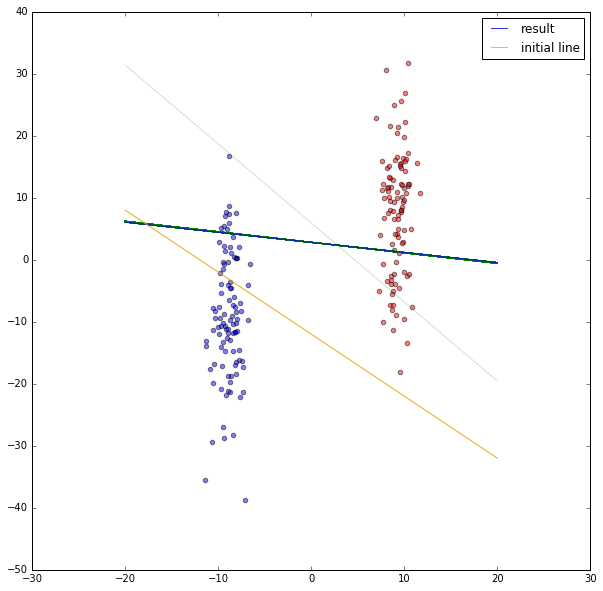

In [661]:
w_all, n = gradient_descent(X,Y,eps=1e-5,init=[12,1,1],abort=1e3)
print(w_all[-1])
print(n)
build_2D_plot(X,Y)
for w in w_all:
    build_2D_line(w,alpha=0.2)
build_2D_line(w_all[-1],alpha=0.8,color='blue',label='result')
build_2D_line(w_all[0],alpha=0.8,color='orange',label='initial line')
plt.legend()

Наблюдаемымый результат далек от желаемого.
Может оказаться, что алгоритм попадает в локальный минимум, либо для данной системы точек минимум функции не дает желаемого резльтата. 

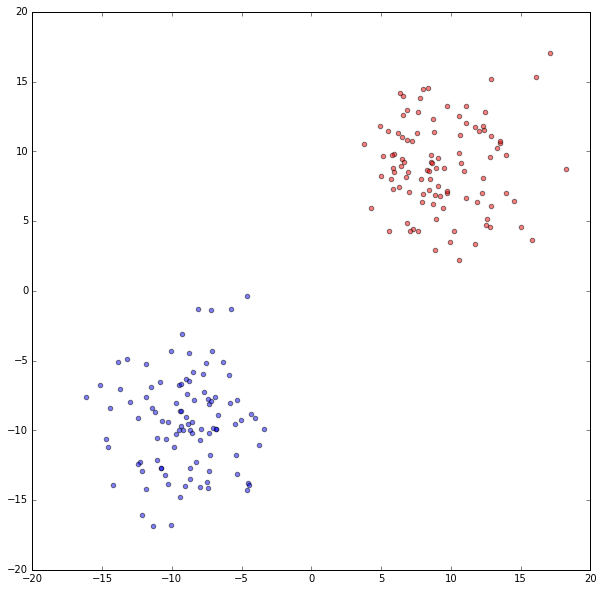

In [675]:
a,d=9,10
mean = [[a,a], [-a,-a]]
cov = [[[d,0],[0,d]],[[d,0],[0,d]]]
col = ['red','blue']
size = 100
X = [0,0]
X[0]=(sps.multivariate_normal.rvs(size=size,mean=mean[0],cov=cov[0])) #set 1
X[1]=(sps.multivariate_normal.rvs(size=size,mean=mean[1],cov=cov[1])) #set 2
X = np.concatenate([X[0],X[1]])
Y = np.concatenate([-1 * np.ones(size,dtype=int), np.ones(size,dtype=int)])
# plt.figure(figsize=(5,5))
build_2D_plot(X,Y)

[ 11.3276609   -4.55482983  -1.03779813]
1000


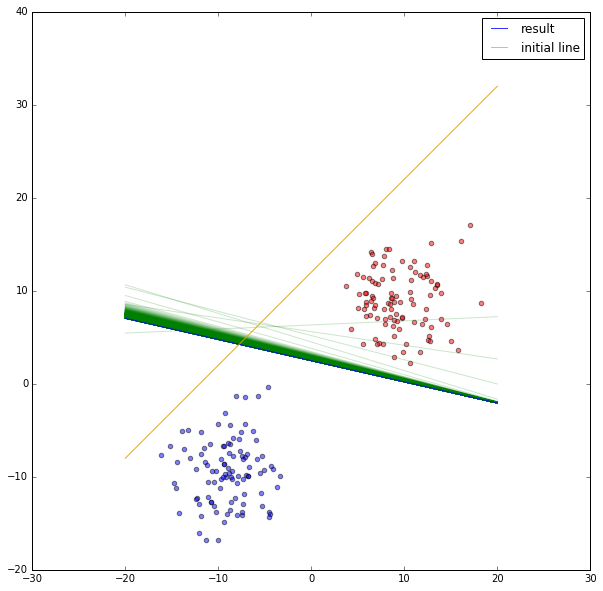

In [676]:
w_all, n = gradient_descent(X,Y,eps=1e-5,init=[12,-1,1],abort=1e3)
print(w_all[-1])
print(n)
build_2D_plot(X,Y)
for w in w_all:
    build_2D_line(w,alpha=0.2)
build_2D_line(w_all[-1],alpha=0.8,color='blue',label='result')
build_2D_line(w_all[0],alpha=0.8,color='orange',label='initial line')
plt.legend()

А для такого набора точек, получаем хороший результат, 2 множества отделились. 

Но требуемая точность сходимости не была получена даже за 1000 шагов.

Исследуем теперь неотделимые прямой множества

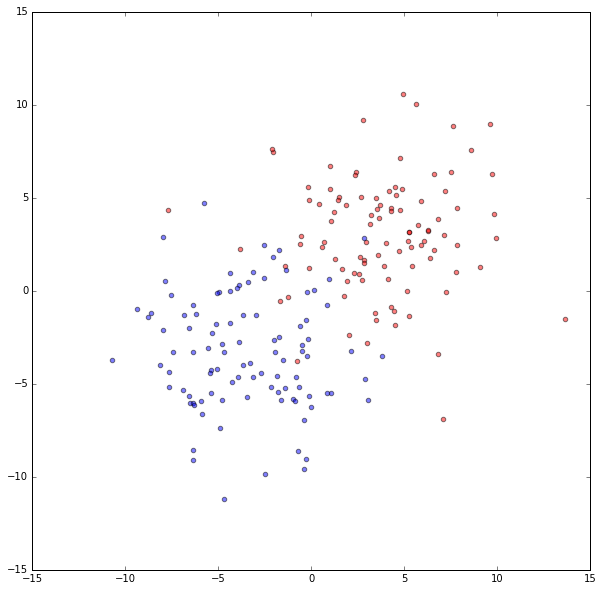

In [677]:
a,d=3,10
mean = [[a,a], [-a,-a]]
cov = [[[d,0],[0,d]],[[d,0],[0,d]]]
col = ['red','blue']
size = 100
X = [0,0]
X[0]=(sps.multivariate_normal.rvs(size=size,mean=mean[0],cov=cov[0])) #set 1
X[1]=(sps.multivariate_normal.rvs(size=size,mean=mean[1],cov=cov[1])) #set 2
X = np.concatenate([X[0],X[1]])
Y = np.concatenate([-1 * np.ones(size,dtype=int), np.ones(size,dtype=int)])
# plt.figure(figsize=(5,5))
build_2D_plot(X,Y)

[ 0.06091499 -0.70805834 -0.68934145]
47


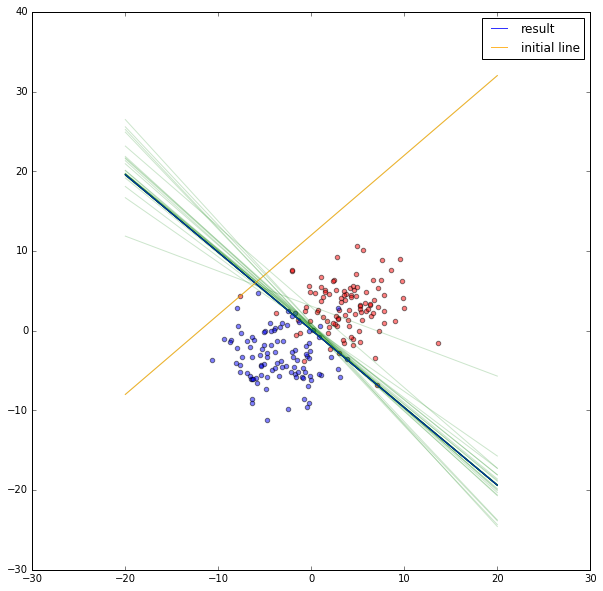

In [678]:
w_all, n = gradient_descent(X,Y,eps=1e-5,init=[12,-1,1],abort=1e3)
print(w_all[-1])
print(n)
build_2D_plot(X,Y)
for w in w_all:
    build_2D_line(w,alpha=0.2)
build_2D_line(w_all[-1],alpha=0.8,color='blue',label='result')
build_2D_line(w_all[0],alpha=0.8,color='orange',label='initial line')
plt.legend()

[ 0.0609146  -0.70805798 -0.68934174]
47


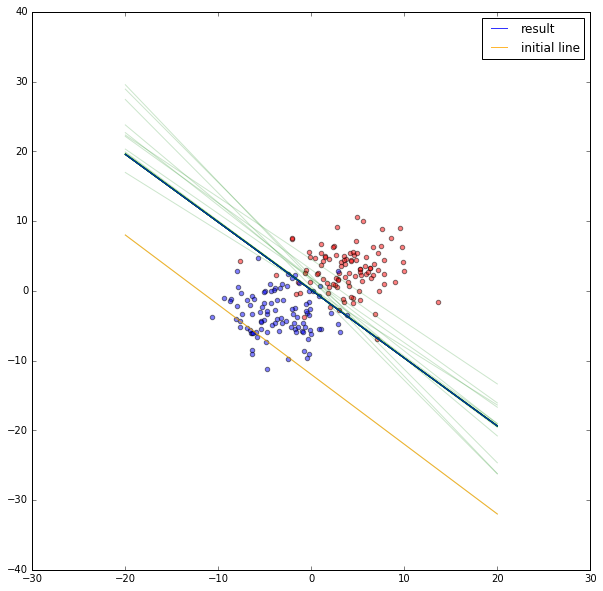

In [680]:
w_all, n = gradient_descent(X,Y,eps=1e-5,init=[12,1,1],abort=1e3)
print(w_all[-1])
print(n)
build_2D_plot(X,Y)
for w in w_all:
    build_2D_line(w,alpha=0.2)
build_2D_line(w_all[-1],alpha=0.8,color='blue',label='result')
build_2D_line(w_all[0],alpha=0.8,color='orange',label='initial line')
plt.legend()

Для множествв, не отделимых прямой, алгоритм работает хорошо и сходится за обозримое число шагов.

Сравним скорости сходимости при выборе размера шага алгоритмами Армихо и $f(k) = k^{-4}$, где $k$ - номер итерации алгоритма минимизации.

In [703]:
def step_size_function(w,X,Y,k) :
    return (1 + k)**(-4)

In [708]:
n_armijo = []
n_const = []
eps_all = []
for i in range(15):
    eps = 0.5 ** i
    w_all, n = gradient_descent(X,Y,eps=eps,init=[12,-1,1],abort=1e5)
    n_armijo.append(n)
    w_all, n = gradient_descent(X,Y,eps=eps,init=[12,-1,1],abort=1e5,step_size=step_size_function)
    n_const.append(n)
    eps_all.append(eps)
#     print(i)
eps_all = np.array(eps_all)

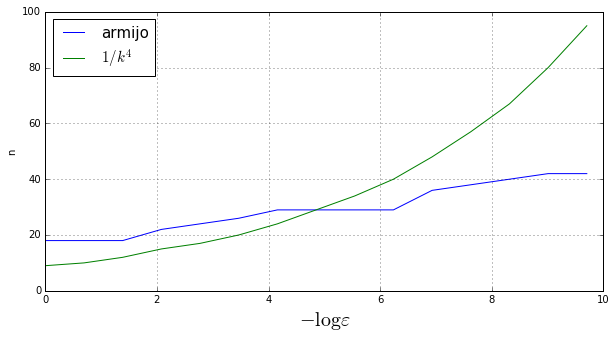

In [721]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(np.log(1/eps_all), n_armijo, label='armijo')
plt.plot(np.log(1/eps_all), n_const, label=r'$1/ k^4$')
plt.ylabel('n')
plt.xlabel(r'$ -\log \varepsilon$',fontsize=20)
plt.legend(fontsize=15, loc='best')
plt.show()

При увеличении точности, количество итераций при использовании алгоритма Армихо растет медленнее чем при вотором алгоритме.